In [0]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.options.display.max_columns=1000
import pandas_profiling

# Data

- fsfgdrgdg

> Image recfgdgerertw

In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.163 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,id;q=0.8,ms;q=0.7,ta;q=0.6" --header="Referer: https://www.kaggle.com/" --header="Cookie: _ga=GA1.3.441449393.1530659697" --header="Connection: keep-alive" "https://storage.googleapis.com/kaggle-data-sets/111880/269359/upload/seg_train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1587716992&Signature=bEmJnJLPn2U5r0XlFbJ6oG1vcfG3Sr2wzv%2FybpHskgATT5C6IgKqjWf%2BFS%2BSfmtmezYVr%2BV35c3LgWQN70jkAKywGdHW1khcMz8EWGpJTuY%2BDs1w8rhenLhZR5HVACnEs2XM2zatf4iw8vaMyn%2BaSQvlTtZkorJvVUaIdLxXTPBrN7OL6hyNOJTH2qN4wMgdewNV4bg6948PJIJzDdLt6Hnhzv7TSudEsX%2F3J3h8NnWKddM%2BtkICrBc6a9g376I5yQnjVUHh2ZKn9p6AshZpf6bCfAoVKPXKlVPHT34I0%2FJNjSAVaDPadlsTONbvBM%2Fh9nFN%2FZ7PbbrQfXkvddzXiQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dseg_train.zip" -c -O 'seg_train.zip'

--2020-04-21 08:30:08--  https://storage.googleapis.com/kaggle-data-sets/111880/269359/upload/seg_train.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1587716992&Signature=bEmJnJLPn2U5r0XlFbJ6oG1vcfG3Sr2wzv%2FybpHskgATT5C6IgKqjWf%2BFS%2BSfmtmezYVr%2BV35c3LgWQN70jkAKywGdHW1khcMz8EWGpJTuY%2BDs1w8rhenLhZR5HVACnEs2XM2zatf4iw8vaMyn%2BaSQvlTtZkorJvVUaIdLxXTPBrN7OL6hyNOJTH2qN4wMgdewNV4bg6948PJIJzDdLt6Hnhzv7TSudEsX%2F3J3h8NnWKddM%2BtkICrBc6a9g376I5yQnjVUHh2ZKn9p6AshZpf6bCfAoVKPXKlVPHT34I0%2FJNjSAVaDPadlsTONbvBM%2Fh9nFN%2FZ7PbbrQfXkvddzXiQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dseg_train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.6.48, 2607:f8b0:4005:809::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.6.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208832464 (199M) [application/x-zip-compressed]
Saving to: ‘seg_train.zip’

seg_train.zip       100%[============

In [0]:
import os
os.listdir('seg_train/forest')[:10]

['15421.jpg',
 '6661.jpg',
 '9522.jpg',
 '16835.jpg',
 '13973.jpg',
 '19758.jpg',
 '236.jpg',
 '11969.jpg',
 '1481.jpg',
 '7417.jpg']

# Model

In [0]:
from fastai2.vision.all import *

In [0]:
path = Path()

In [0]:
path.ls()

(#4) [Path('seg_train'),Path('Intel Scene Classification.ipynb'),Path('seg_train.zip'),Path('.ipynb_checkpoints')]

In [0]:
path_img_names = get_image_files(path/'seg_train')

In [0]:
path_img_names[:10]

(#10) [Path('seg_train/glacier/1044.jpg'),Path('seg_train/glacier/4006.jpg'),Path('seg_train/glacier/3071.jpg'),Path('seg_train/glacier/16027.jpg'),Path('seg_train/glacier/4741.jpg'),Path('seg_train/glacier/9635.jpg'),Path('seg_train/glacier/19058.jpg'),Path('seg_train/glacier/7962.jpg'),Path('seg_train/glacier/4476.jpg'),Path('seg_train/glacier/4084.jpg')]

In [0]:
len(path_img_names)

14034

In [0]:
path_img_names[0].parent.name

'glacier'

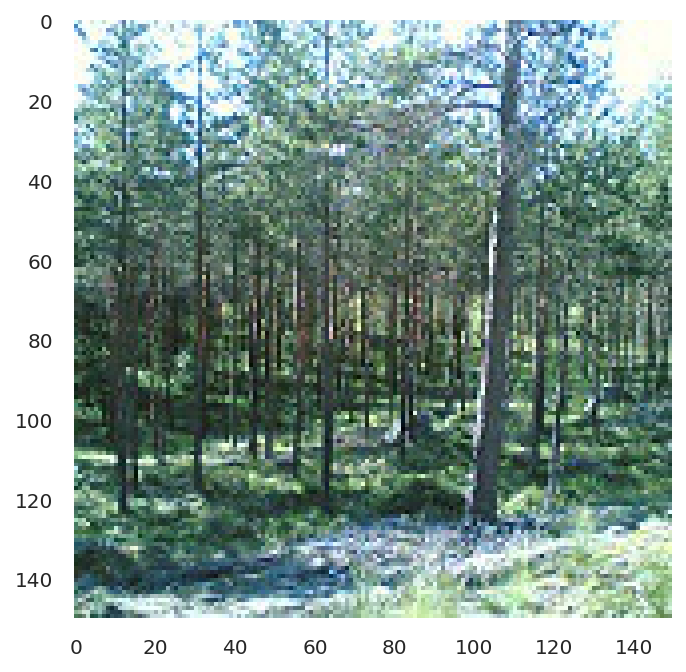

In [0]:
plt.imshow(plt.imread(str(path_img_names[5000])))

In [0]:
data = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    
    splitter=RandomSplitter(valid_pct=0.25,seed=1),
    
    item_tfms=Resize(150),
    batch_tfms = aug_transforms(size=150,max_rotate=20,max_lighting=0.4,max_zoom=1.3)
)

In [0]:
path.ls()

(#4) [Path('seg_train'),Path('Intel Scene Classification.ipynb'),Path('seg_train.zip'),Path('.ipynb_checkpoints')]

In [0]:
dls = data.dataloaders(path/'seg_train')

In [0]:
data.summary(path/'seg_train')

Setting-up type transforms pipelines
Found 14034 items
2 datasets of sizes 10526,3508
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      seg_train/glacier/14740.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=150x150
  Pipeline: parent_label -> Categorize
    starting from
      seg_train/glacier/14740.jpg
    applying parent_label gives
      glacier
    applying Categorize gives
      TensorCategory(2)

Final sample: (PILImage mode=RGB size=150x150, TensorCategory(2))


Setting up after_item: Pipeline: Resize -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor -> AffineCoordTfm -> LightingTfm

Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -> ToTensor
    starting from
      (PILImage mode=RGB size=150x150, TensorCategory(2))
    applying Resize gives
      (PILImage mode=RGB size=150x

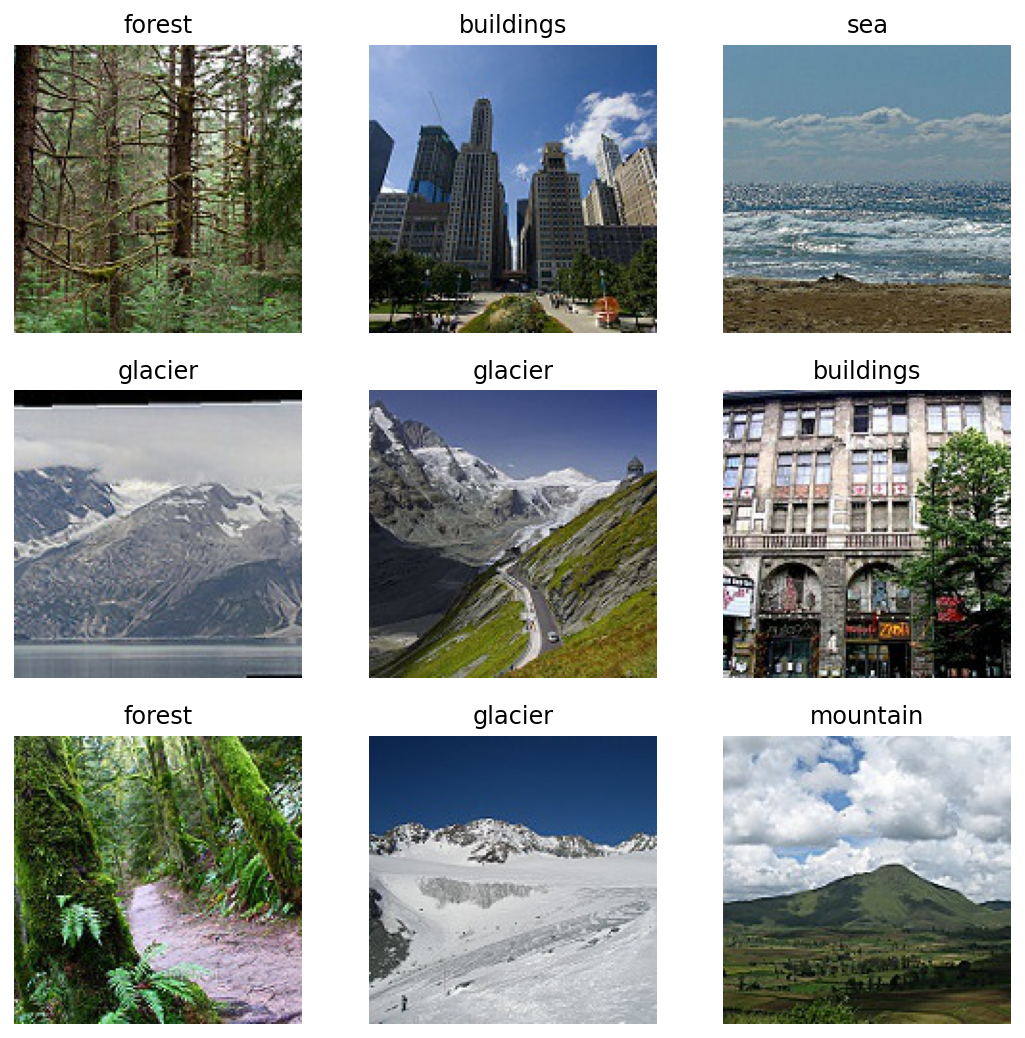

In [0]:
dls.valid.show_batch()

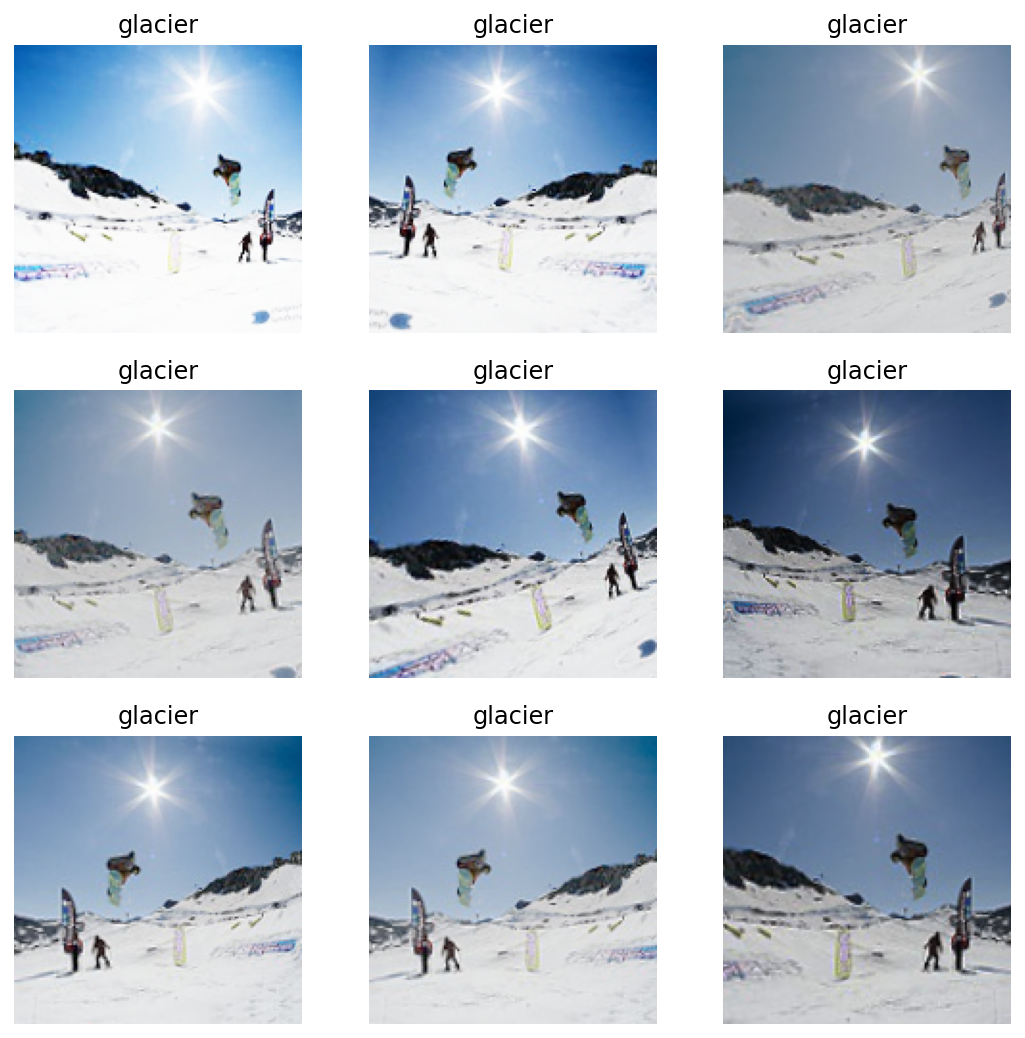

In [0]:
dls.train.show_batch(unique=True)

In [0]:
learn = cnn_learner(dls,resnet34,metrics=[accuracy,error_rate])

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.00363078061491251)

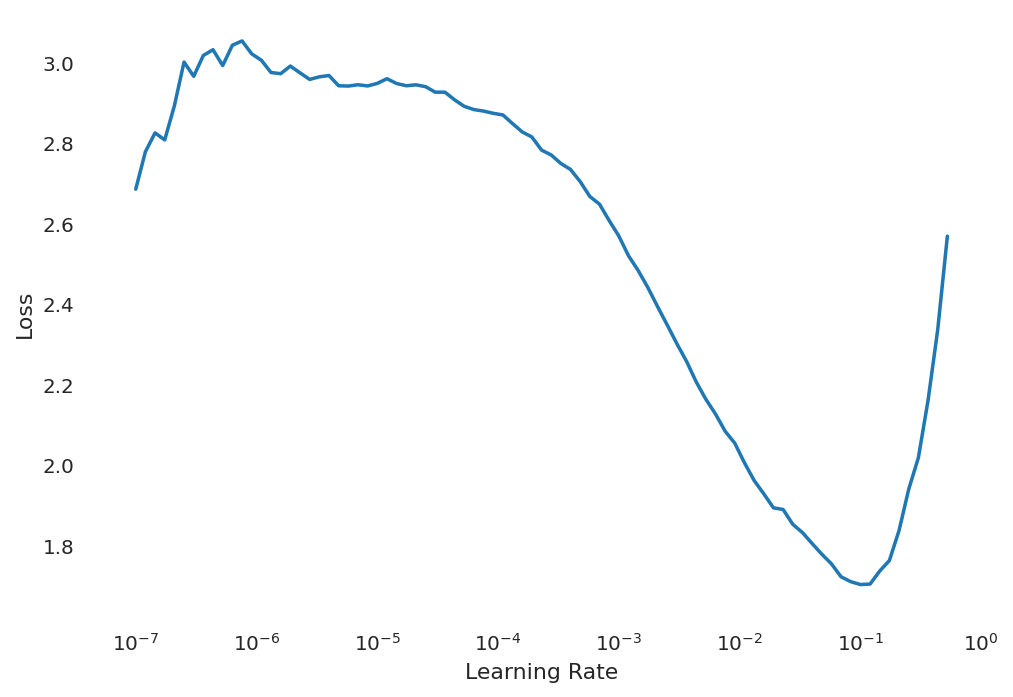

In [0]:
learn.lr_find()

In [0]:
learn.fine_tune(4, base_lr=1e-2)

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

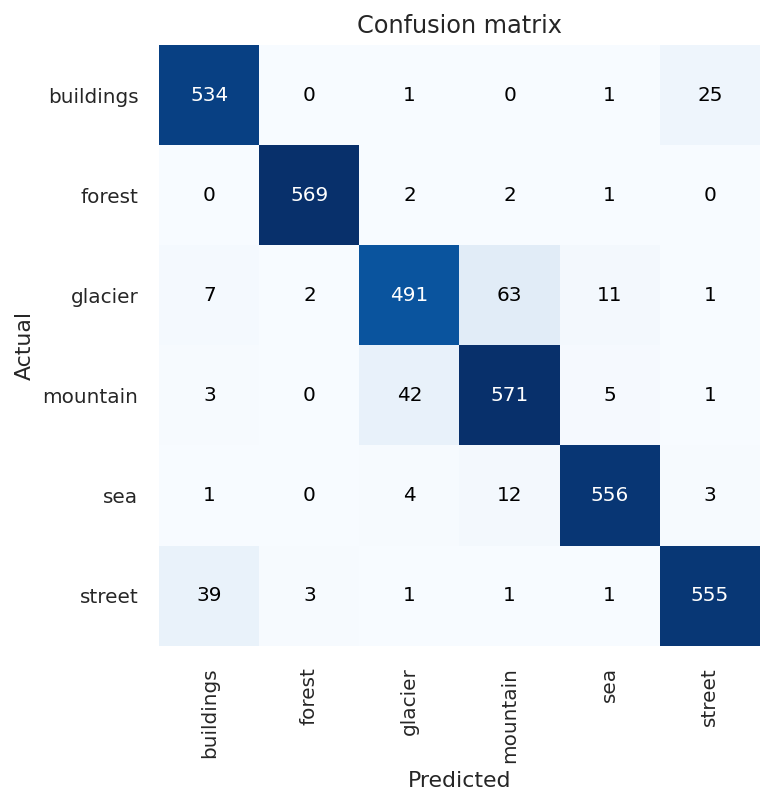

In [0]:
interp.plot_confusion_matrix()

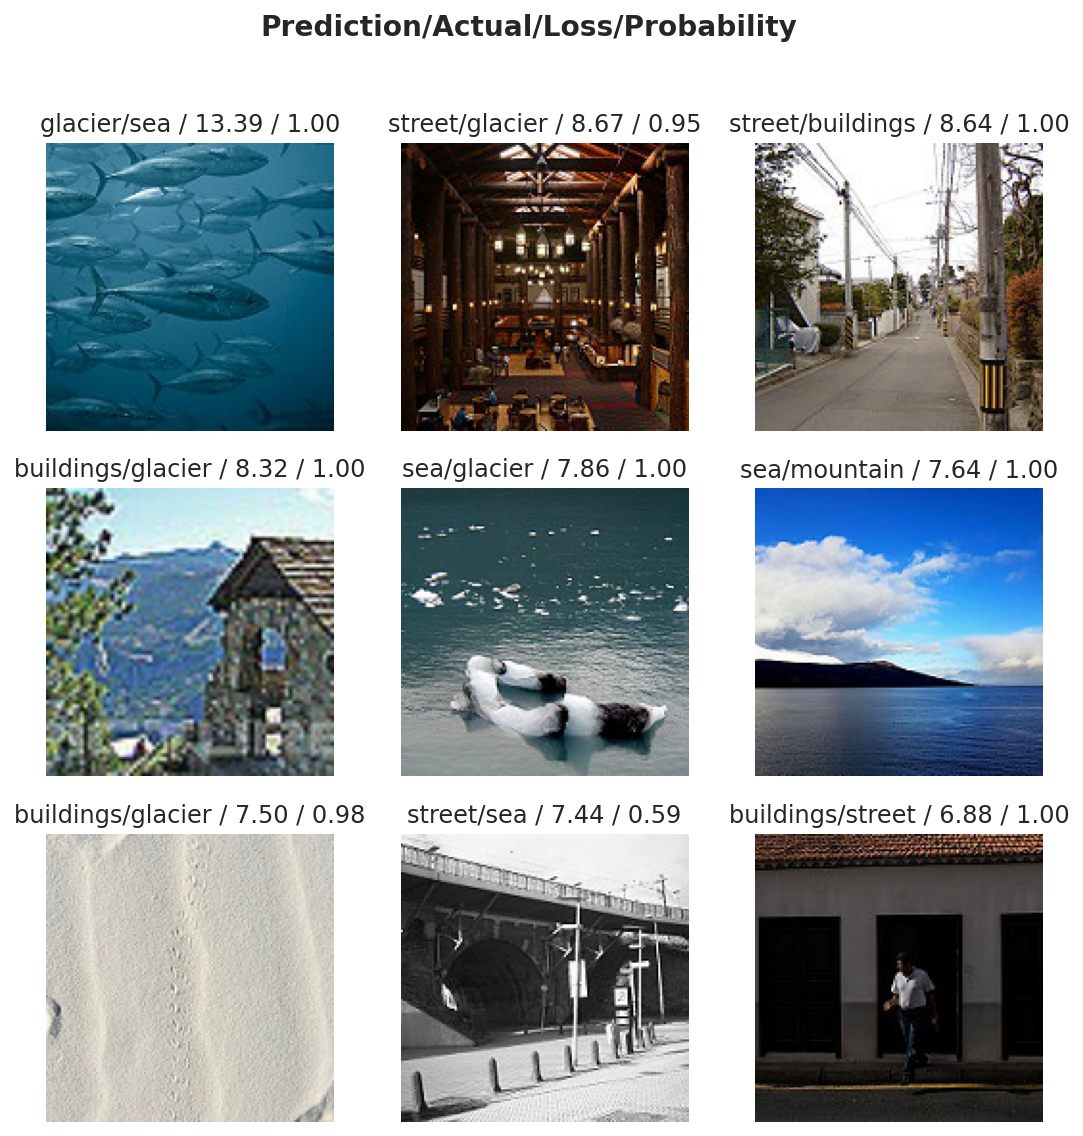

In [0]:
interp.plot_top_losses(9)

In [0]:
!wget https://upload.wikimedia.org/wikipedia/commons/f/fe/Lloyd%27s_building_interior.jpg

--2020-04-21 09:10:37--  https://upload.wikimedia.org/wikipedia/commons/f/fe/Lloyd%27s_building_interior.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322159 (315K) [image/jpeg]
Saving to: ‘Lloyd's_building_interior.jpg’

Lloyd's_building_in 100%[===================>] 314.61K  --.-KB/s    in 0.01s   

2020-04-21 09:10:37 (22.8 MB/s) - ‘Lloyd's_building_interior.jpg’ saved [322159/322159]



In [0]:
img = PILImage.create("Lloyd's_building_interior.jpg")

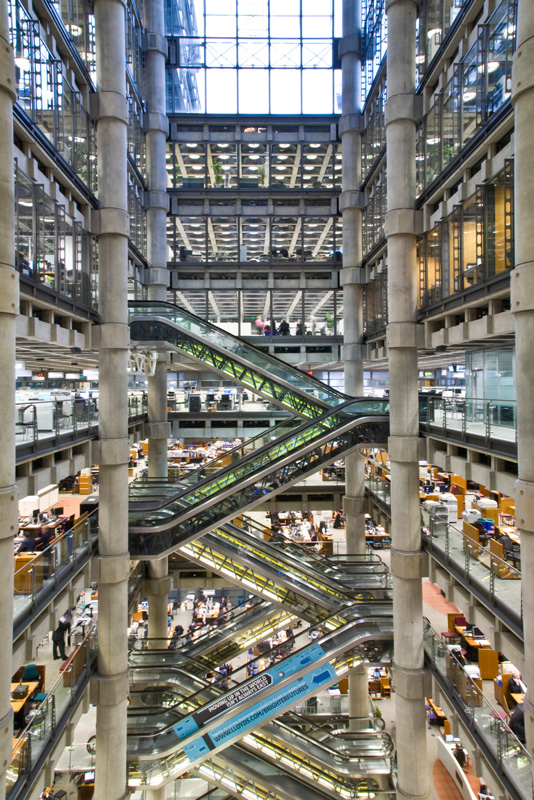

In [0]:
img

In [0]:
learn.predict(img)

('street',
 tensor(5),
 tensor([2.0542e-01, 3.5108e-04, 2.6467e-04, 2.2656e-04, 3.4063e-04, 7.9340e-01]))

In [0]:
path_img_names[5000]

Path('seg_train/forest/9611.jpg')

In [0]:
learn.predict(path_img_names[5000])

('forest',
 tensor(1),
 tensor([9.9206e-07, 9.9996e-01, 3.4438e-05, 7.3699e-07, 1.9520e-06, 4.7824e-07]))